<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importar nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_clustering as sc

# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
# abrimos el conjunto de datos
df = pd.read_csv("datos/WrestlingWorldTournament.csv", index_col=0)
df.head()

name  gender  age  height nationality  weight       sports  \
0         Aaron Peavy  Female   41   165.0     England      82  Boxing, MMA   
1         Abe Rutland    Male   36   185.0       Japan     100         Judo   
2        Adrian Quinn    Male   29   178.5       Japan      93       Karate   
3        Alan Beckham    Male   39   187.5       Japan     107         Judo   
4  Albertha Rodriguez  Female   29   158.0         USA      72          MMA   

   hours_per_day  strength  agility  mental                     federation  \
0              3         7        8       7           Fight Zone Wrestling   
1              0         8        5       9  World Wrestling Entertainment   
2              4         8        8       7  World Wrestling Entertainment   
3              3         7        6       8           Fight Zone Wrestling   
4              1         5        7       7  Consejo Global de Lucha Libre   

   year_start  rank  
0        1989    42  
1        2006   161  
2        2012   153  
3        2003   252  
4        2012   360

In [3]:
# instanciamos la clase de Exploración de datos antes de aplicar el algoritmo
preprocesar = sc.Exploracion(df)

# llamamos al método de exploración de datos
preprocesar.explorar_datos()

5 registros aleatorios:


name  gender  age  height nationality  weight  \
205       James Poorman    Male   33   189.0         USA     106   
357         Olivia Dyer  Female   32   167.5         USA      82   
492      William Bryant    Male   31   180.0         USA      97   
443  Stephanie Thompson  Female   18   164.0         USA      72   
498   Yolanda Yamashiro  Female   32   177.0      France      92   

                               sports  hours_per_day  strength  agility  \
205  Boxing, Karate, Kick-Boxing, MMA              6         7        8   
357                       Boxing, MMA              4         6        6   
492               Boxing, Karate, MMA              4         6        6   
443               Boxing, Kick-Boxing              3         4        9   
498                              Judo              2         5        5   

     mental                     federation  year_start  rank  
205       9  Consejo Global de Lucha Libre        2004     8  
357       9  Consejo Global de Lucha Libre        2003   157  
492       9  Consejo Global de Lucha Libre        2006    97  
443       7  Consejo Global de Lucha Libre        2021   452  
498       5  Consejo Global de Lucha Libre        2012   499



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB
None


Duplicados en el DataFrame:
0


Estadísticas descriptivas de las columnas numéricas:


count      mean         std     min      25%     50%       75%  \
age            500.0    31.154    5.438514    18.0    27.00    31.0    35.000   
height         500.0   174.864    9.468623   152.0   167.50   174.0   181.625   
weight         500.0    89.688   11.081889    65.0    81.00    89.0    98.000   
hours_per_day  500.0     3.064    1.375386     0.0     2.00     3.0     4.000   
strength       500.0     6.152    1.567741     2.0     5.00     6.0     7.000   
agility        500.0     7.148    1.455449     3.0     6.00     7.0     8.000   
mental         500.0     6.732    1.197934     3.0     6.00     7.0     8.000   
year_start     500.0  2007.130    6.325910  1986.0  2003.00  2007.0  2011.000   
rank           500.0   250.500  144.481833     1.0   125.75   250.5   375.250   

                  max  
age              53.0  
height          202.0  
weight          123.0  
hours_per_day     8.0  
strength         10.0  
agility          10.0  
mental           10.0  
year_start     2021.0  
rank            500.0



Estadísticas descriptivas de las columnas categóricas:


count unique                   top freq
name          500    500        Zenaida Flagge    1
gender        500      2                Female  265
nationality   500      8                France  118
sports        500     31                Karate   42
federation    500      3  Fight Zone Wrestling  206



Número de valores nulos por columna:
name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64


Distribución de valores categóricos:

Columna: name
name
Zenaida Flagge          1
Aaron Peavy             1
Abe Rutland             1
Adrian Quinn            1
Viola Lonergan          1
                       ..
Alfred Ray              1
Alexander Bracamonte    1
Alexander Boone         1
Alex Harris             1
Albertha Rodriguez      1
Name: count, Length: 500, dtype: int64

Columna: gender
gender
Female    265
Male      235
Name: count, dtype: int64

Columna: nationality
nationality
France       118
Japan        116
USA          115
Australia     64
Egypt         42
England       26
Argentina     12
India          7
Name: count, dtype: int64

Columna: sports
sports


age    height    weight  hours_per_day  strength  \
age            1.000000 -0.001694  0.044624      -0.003731  0.016052   
height        -0.001694  1.000000  0.982154       0.072840  0.658785   
weight         0.044624  0.982154  1.000000       0.071260  0.654799   
hours_per_day -0.003731  0.072840  0.071260       1.000000 -0.025897   
strength       0.016052  0.658785  0.654799      -0.025897  1.000000   
agility       -0.036051 -0.484157 -0.486668       0.326623 -0.384900   
mental         0.219514  0.144129  0.157628       0.275585  0.116703   
year_start    -0.858723  0.005482 -0.039413      -0.136393  0.017604   
rank          -0.208136 -0.251894 -0.257785      -0.458479 -0.383859   

                agility    mental  year_start      rank  
age           -0.036051  0.219514   -0.858723 -0.208136  
height        -0.484157  0.144129    0.005482 -0.251894  
weight        -0.486668  0.157628   -0.039413 -0.257785  
hours_per_day  0.326623  0.275585   -0.136393 -0.458479  
strength      -0.384900  0.116703    0.017604 -0.383859  
agility        1.000000 -0.005940   -0.054115 -0.343249  
mental        -0.005940  1.000000   -0.218854 -0.423994  
year_start    -0.054115 -0.218854    1.000000  0.323980  
rank          -0.343249 -0.423994    0.323980  1.000000

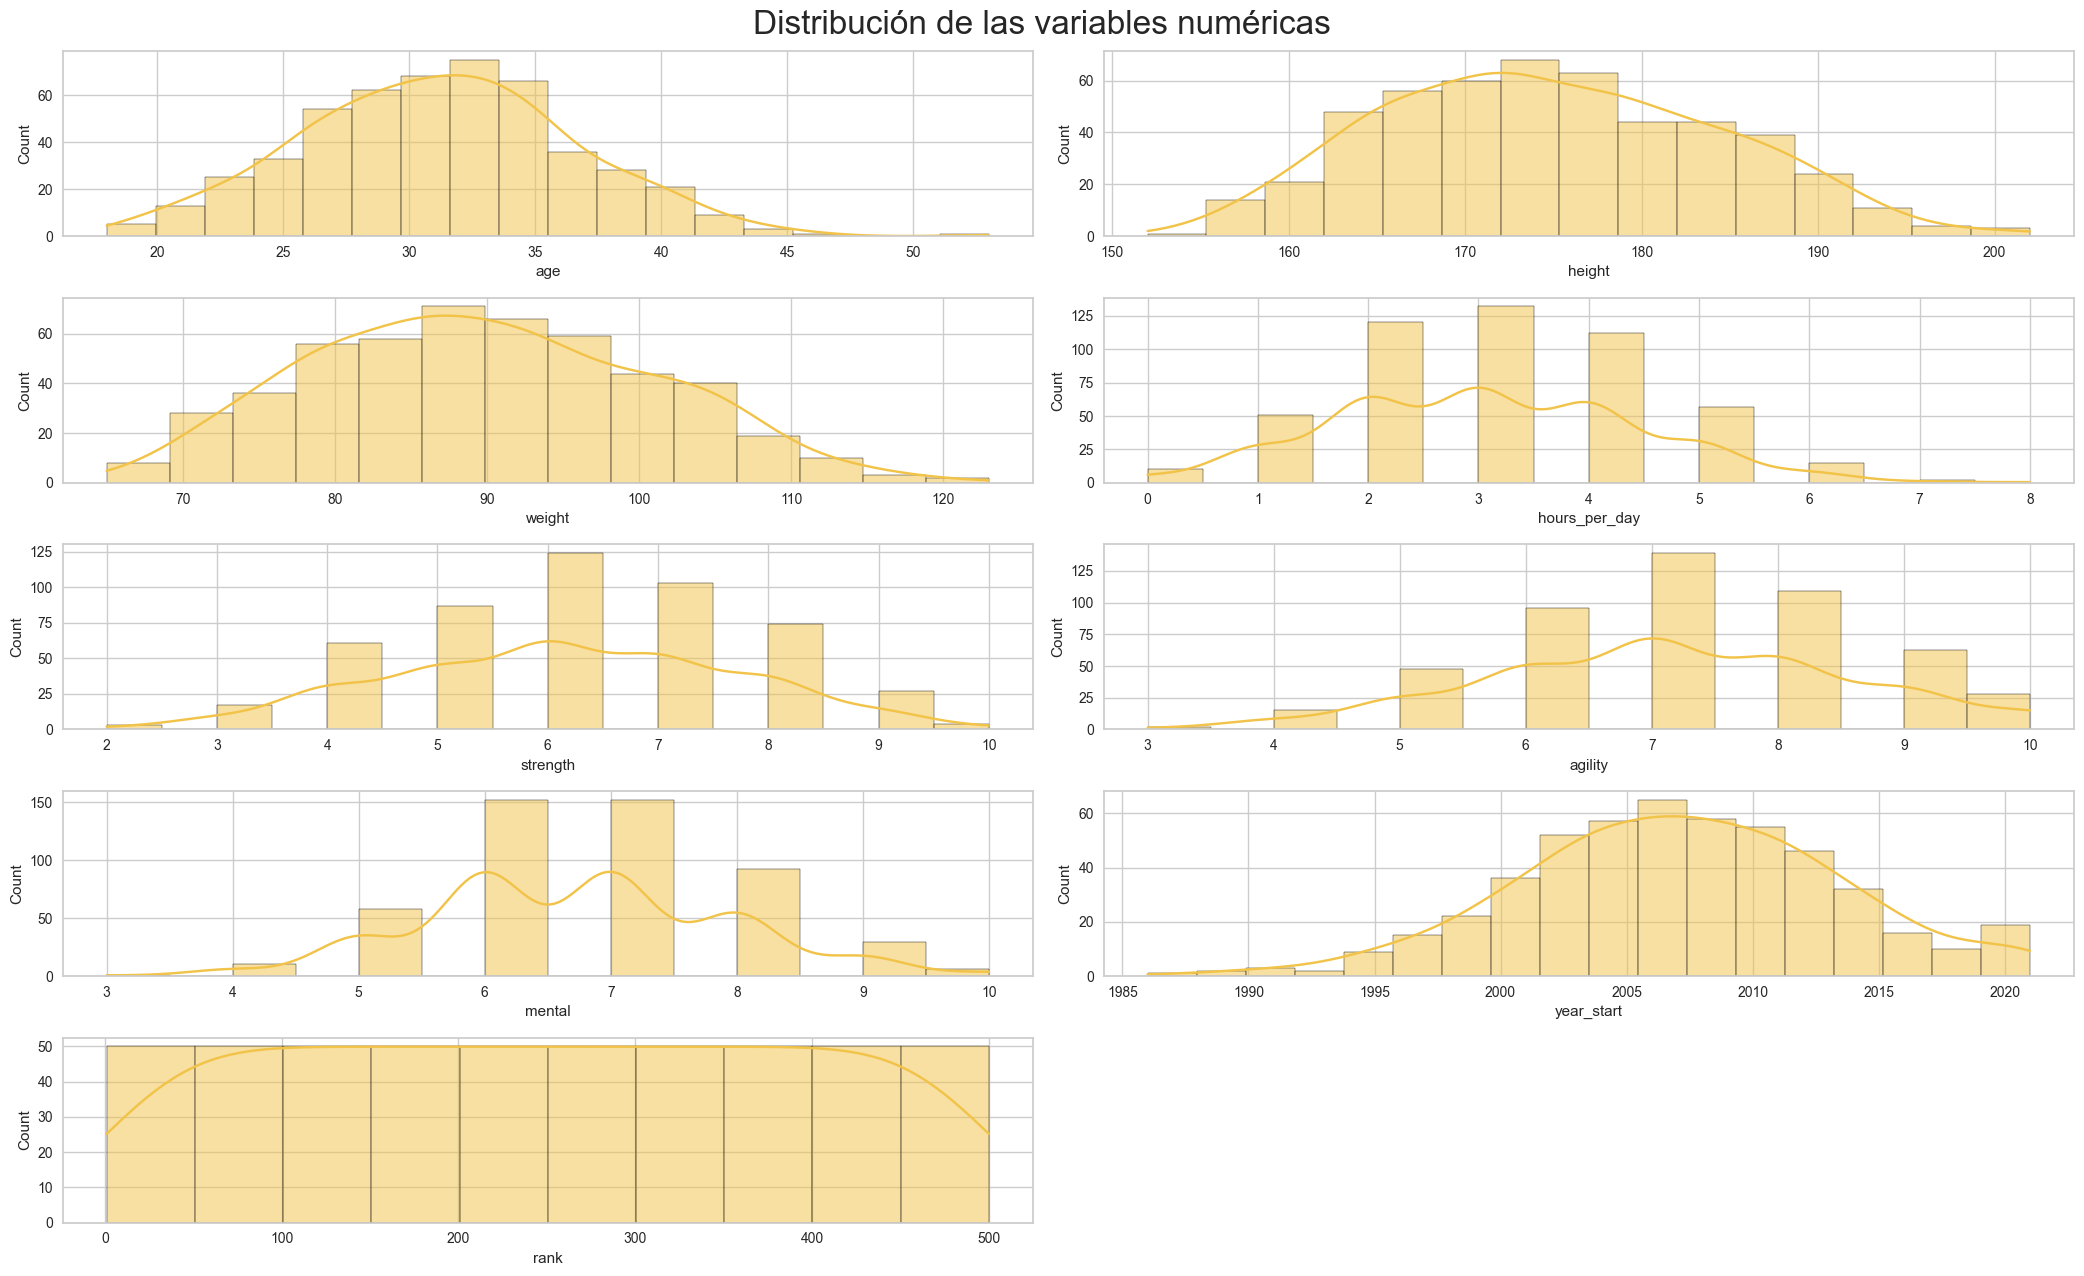

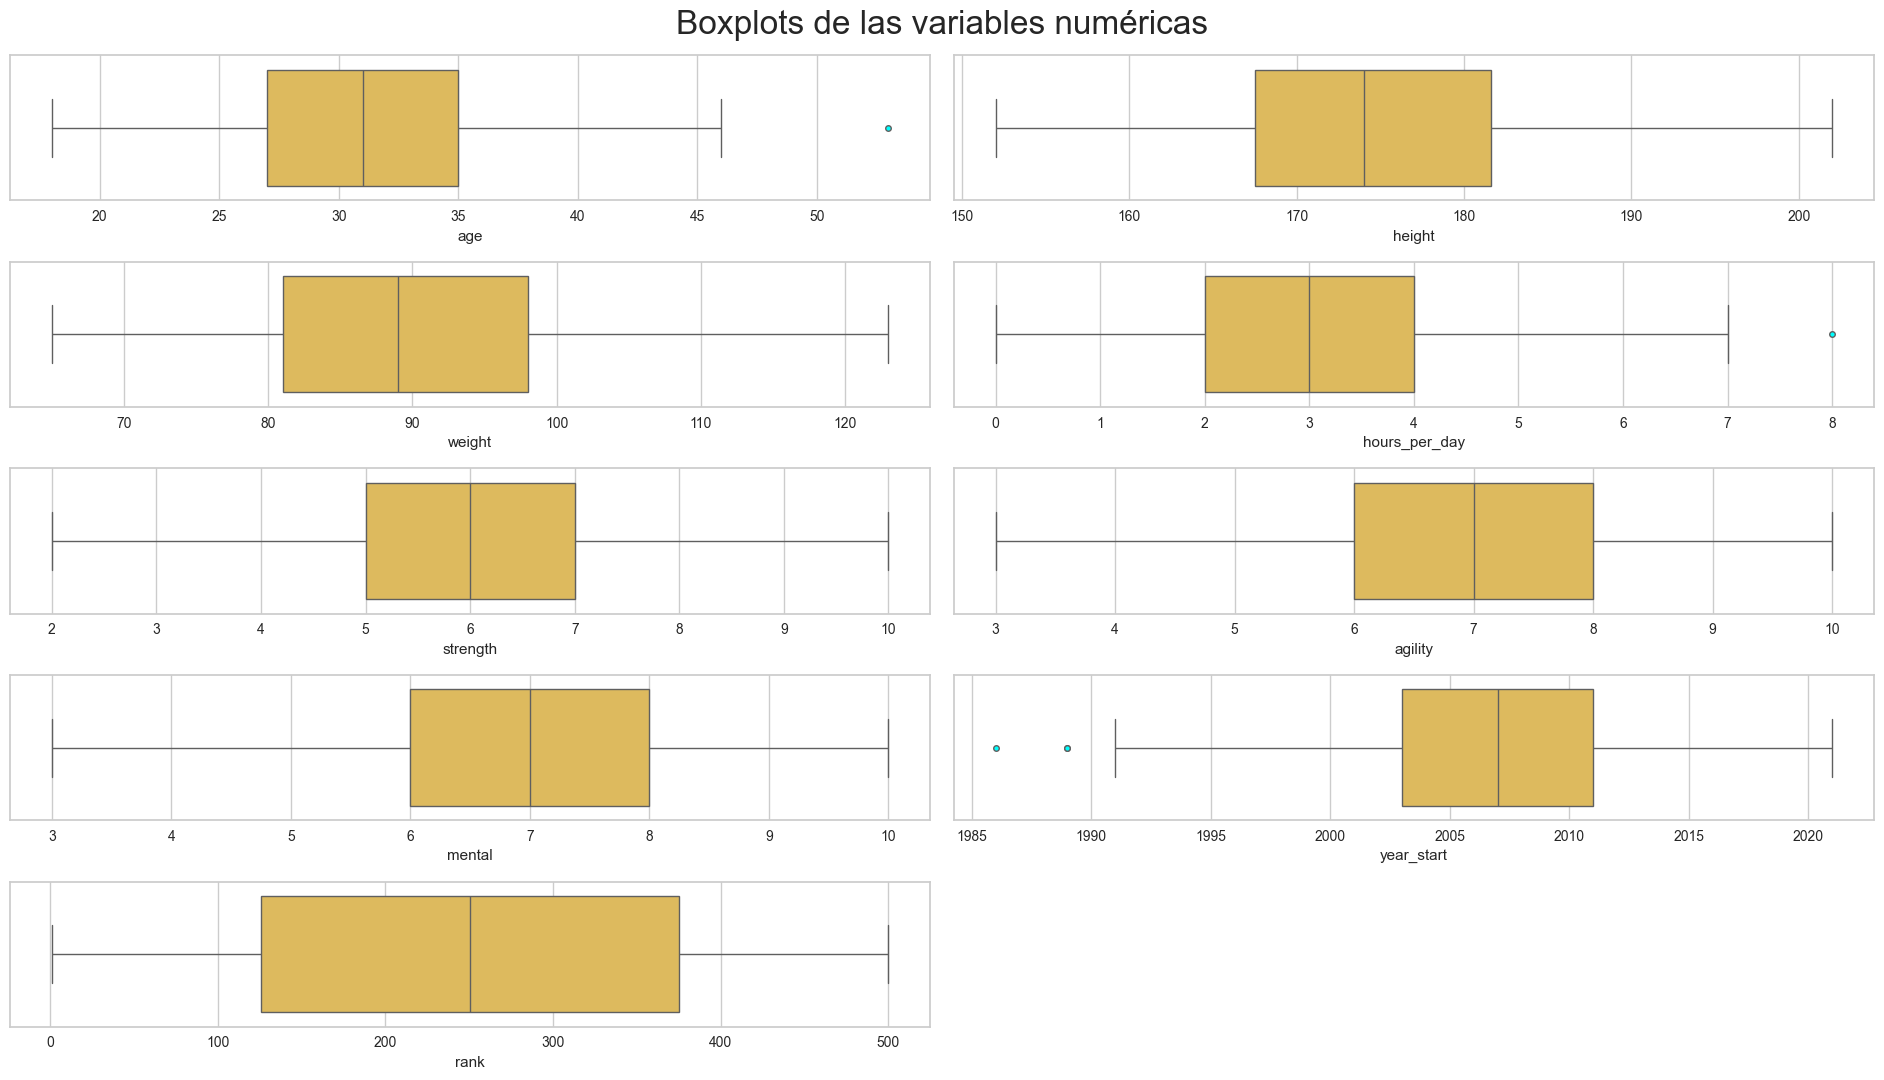

In [4]:
preprocesar.visualizar_numericas()

In [5]:
df = df.drop(columns=['name','federation'])
df

gender  age  height nationality  weight                          sports  \
0    Female   41   165.0     England      82                     Boxing, MMA   
1      Male   36   185.0       Japan     100                            Judo   
2      Male   29   178.5       Japan      93                          Karate   
3      Male   39   187.5       Japan     107                            Judo   
4    Female   29   158.0         USA      72                             MMA   
..      ...  ...     ...         ...     ...                             ...   
495    Male   34   185.5      France     104                            Judo   
496  Female   31   161.5      France      71  Judo, Karate, Kick-Boxing, MMA   
497    Male   22   188.5      France     102                     Kick-Boxing   
498  Female   32   177.0      France      92                            Judo   
499  Female   21   170.5      France      85  Boxing, Judo, Kick-Boxing, MMA   

     hours_per_day  strength  agility  mental  year_start  rank  
0                3         7        8       7        1989    42  
1                0         8        5       9        2006   161  
2                4         8        8       7        2012   153  
3                3         7        6       8        2003   252  
4                1         5        7       7        2012   360  
..             ...       ...      ...     ...         ...   ...  
495              2         9        6       5        2008   353  
496              5         4        9       6        2003    74  
497              3         8        8       7        2021   265  
498              2         5        5       5        2012   499  
499              4         6       10       5        2011    92  

[500 rows x 12 columns]

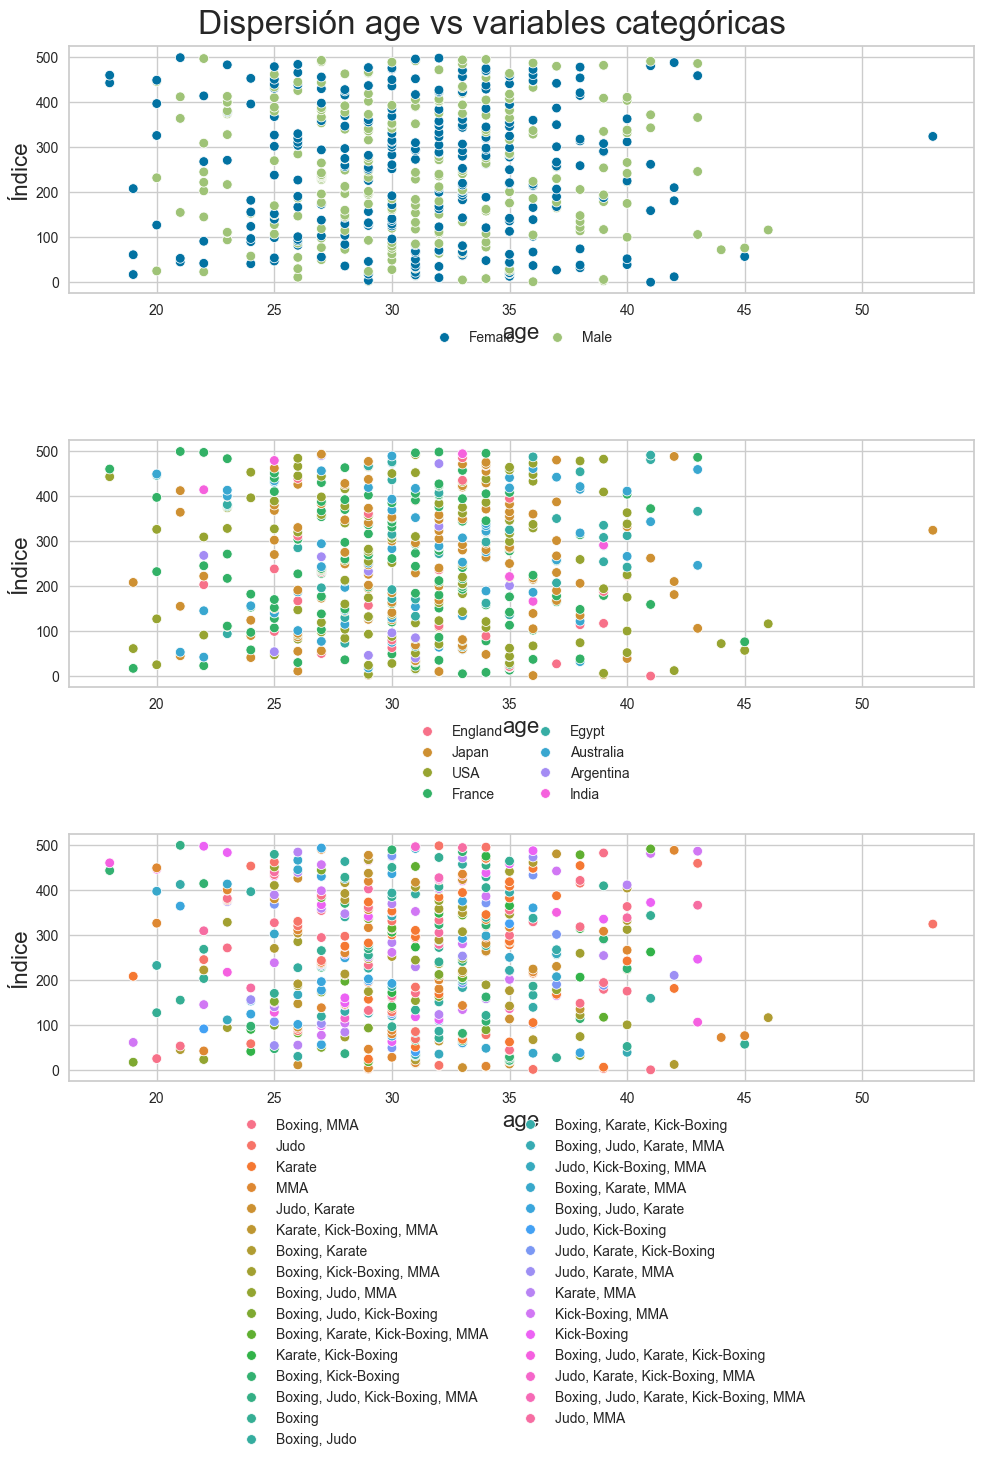

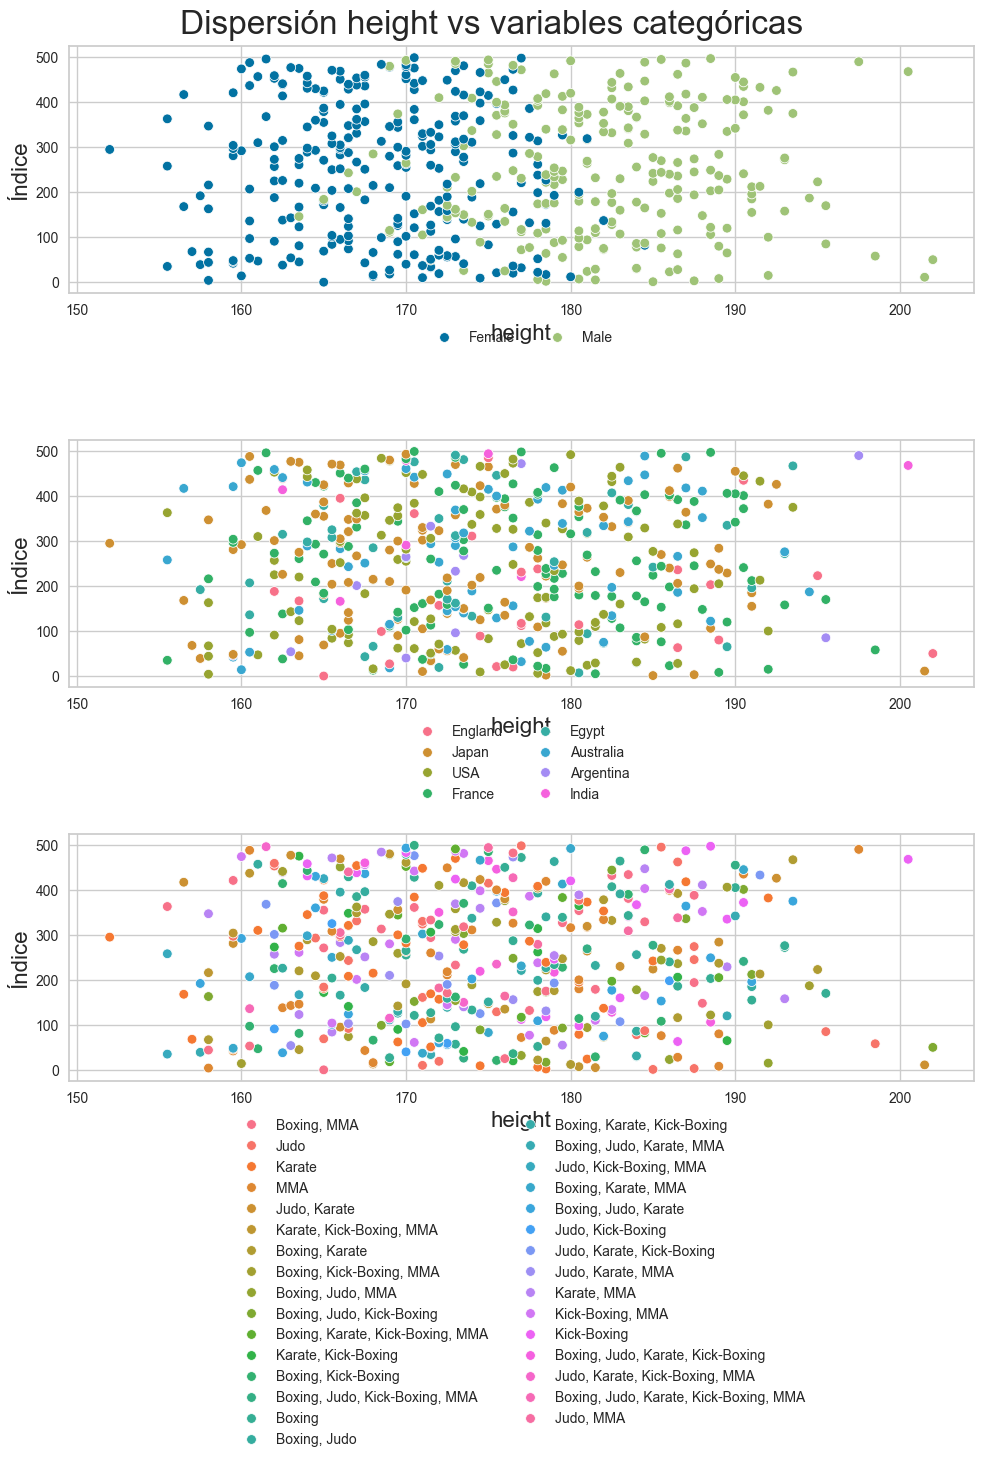

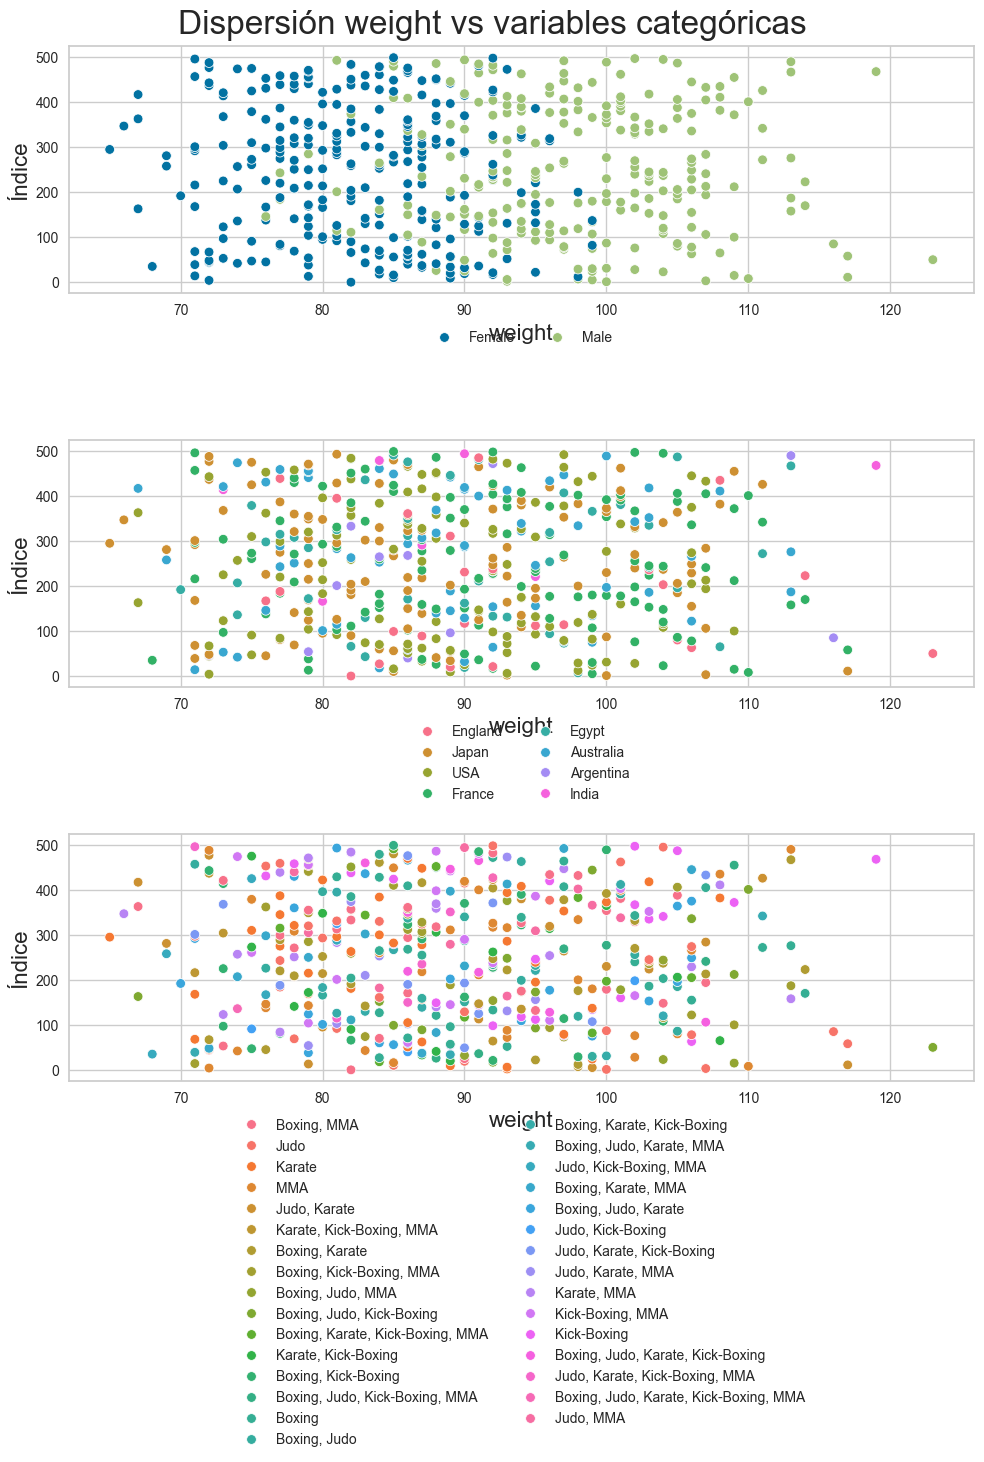

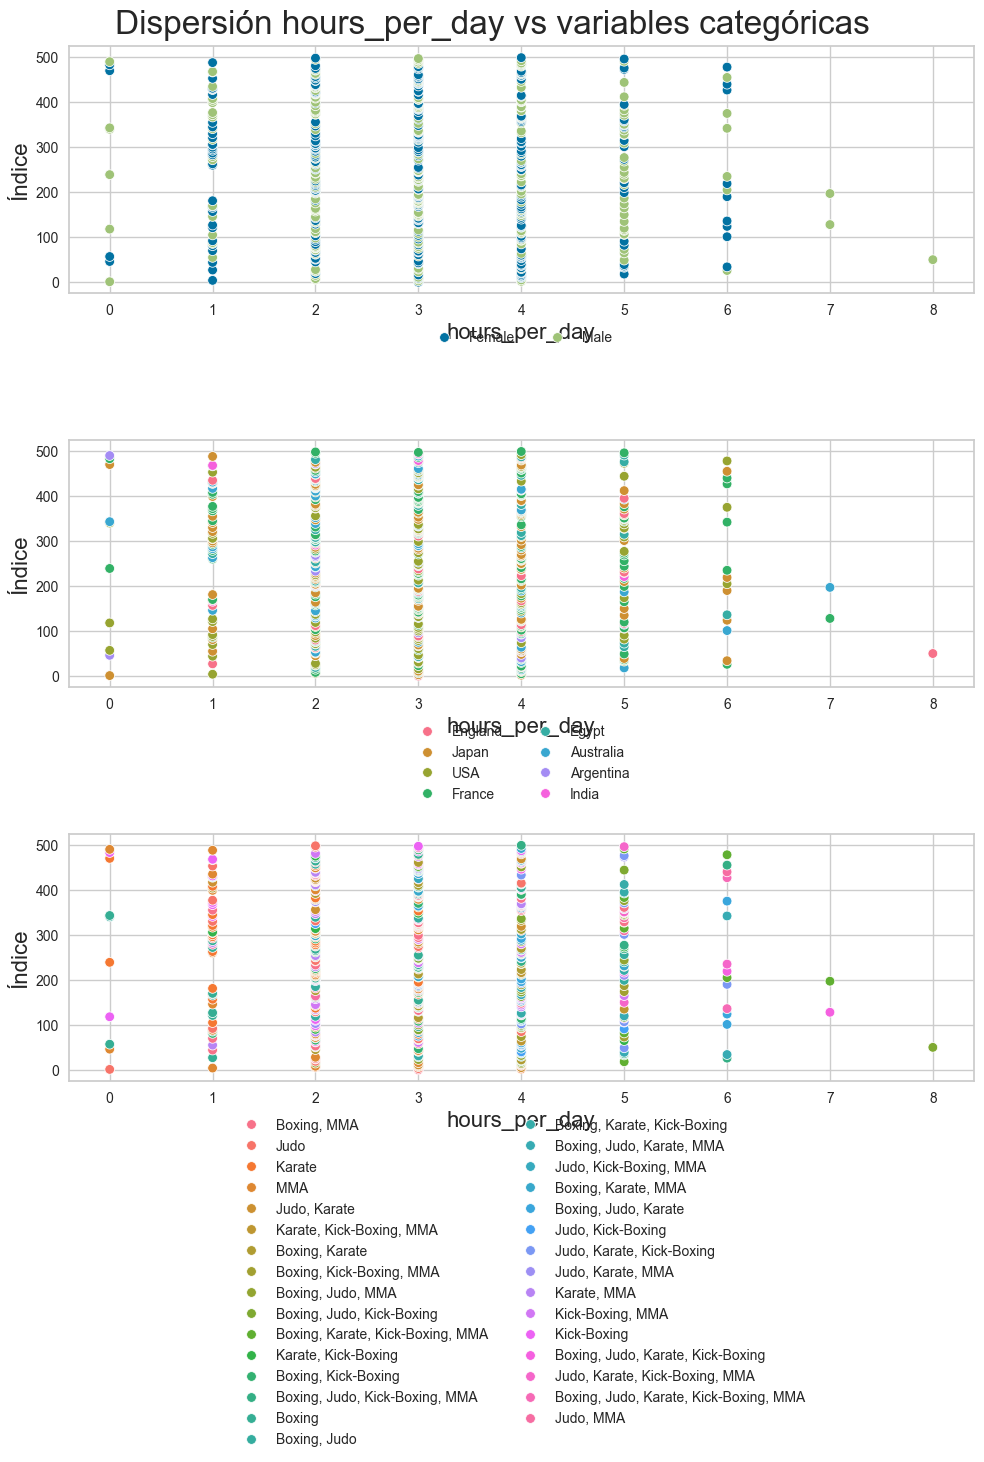

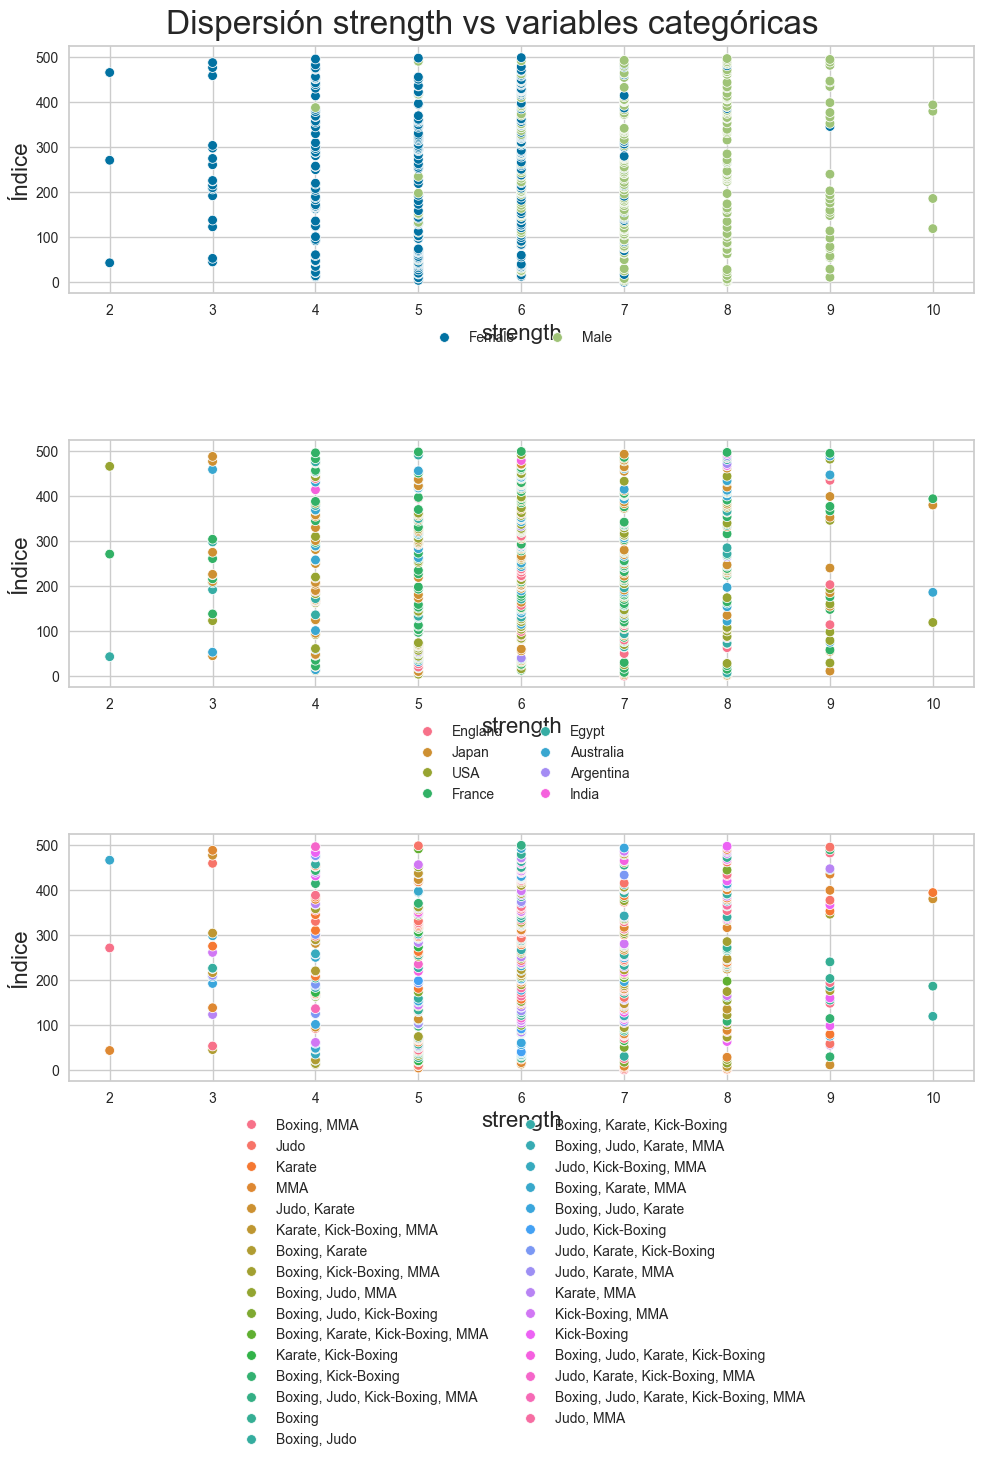

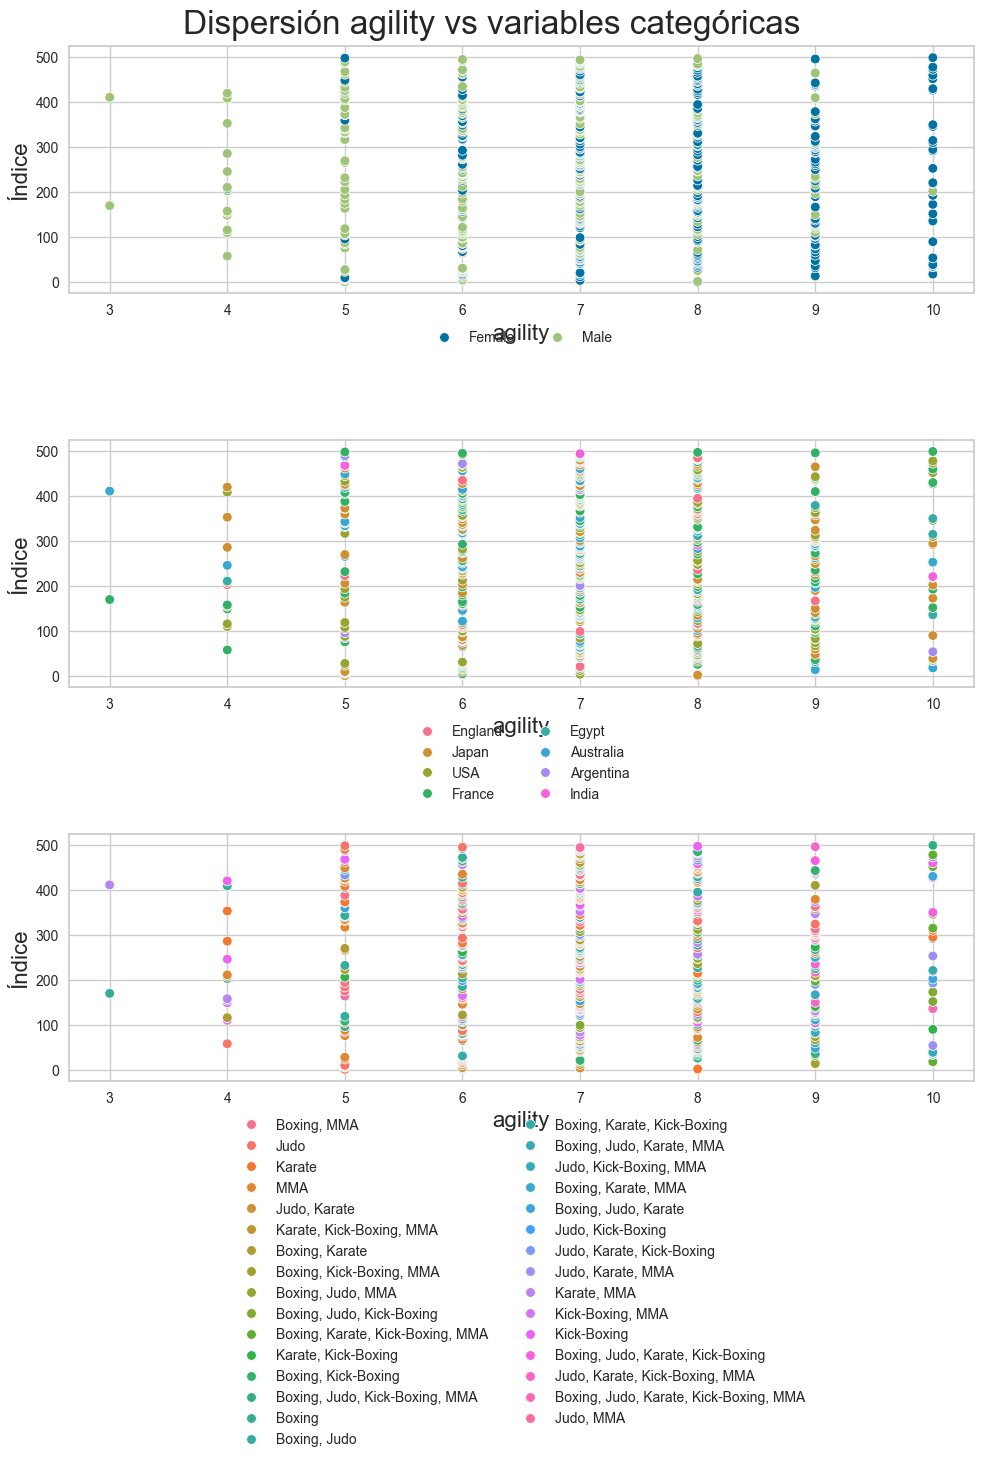

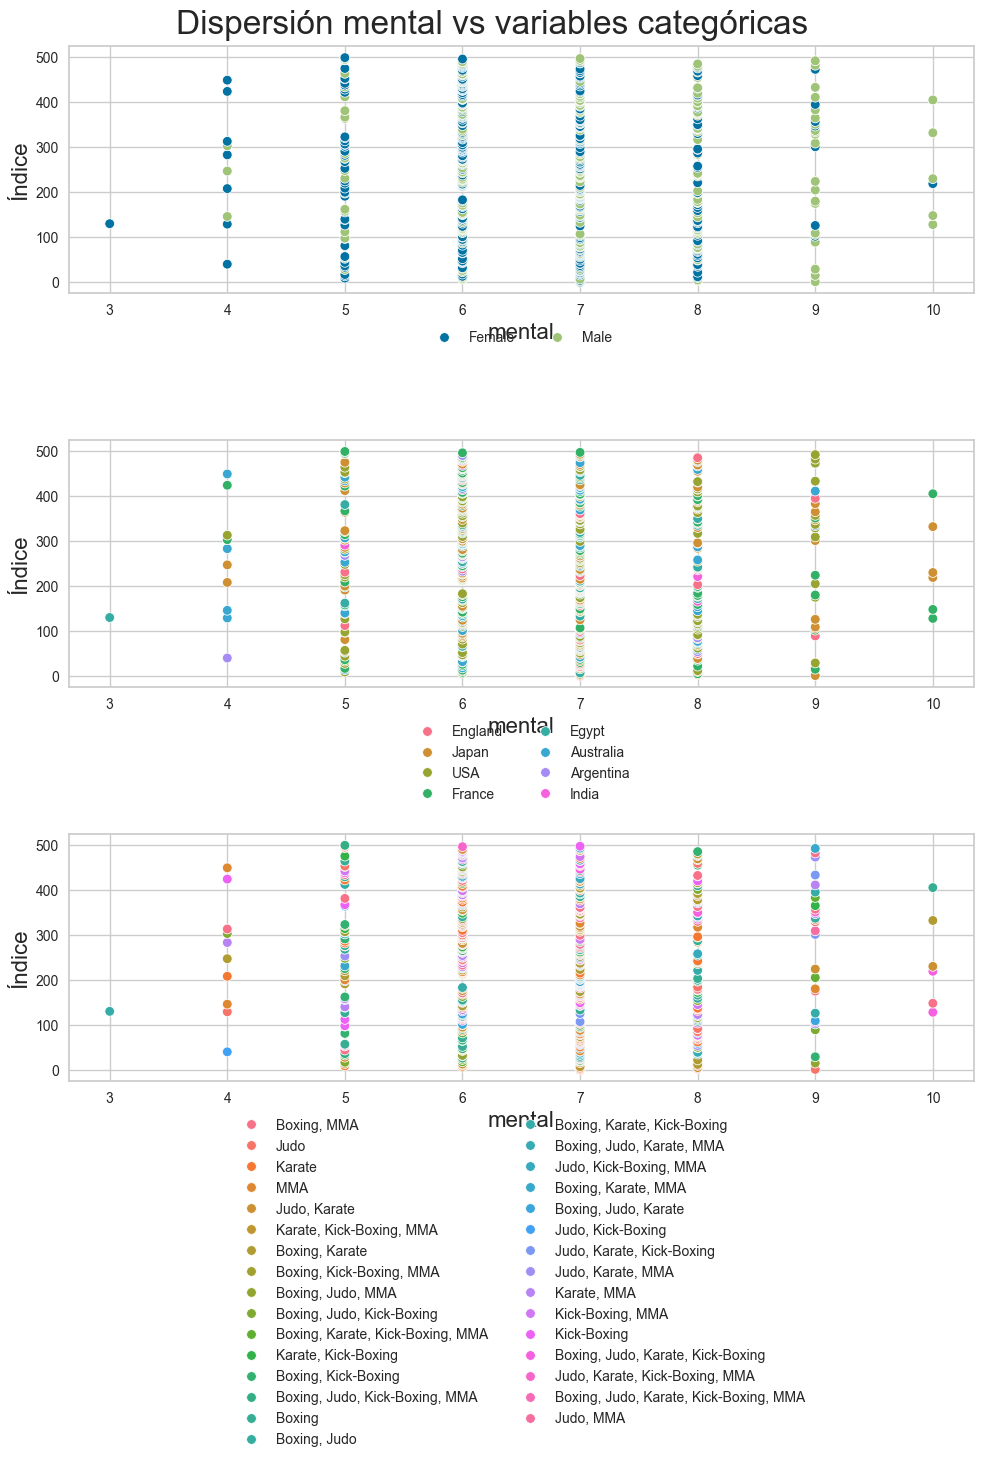

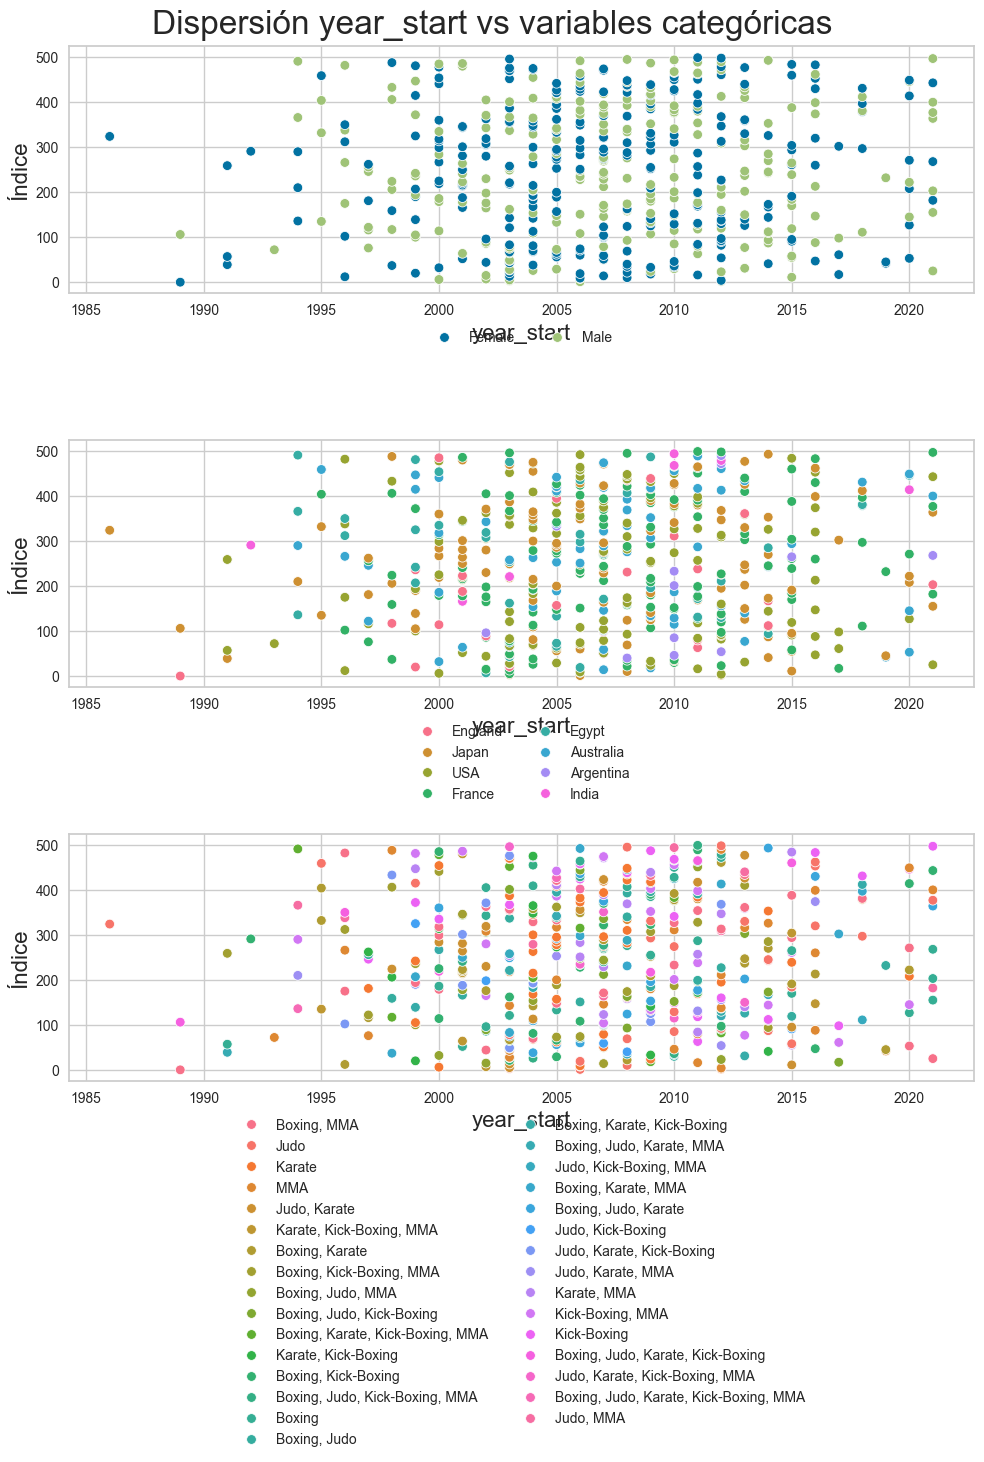

In [6]:
preprocesar = sc.Exploracion(df)
preprocesar.visualizar_categoricas_numericas()

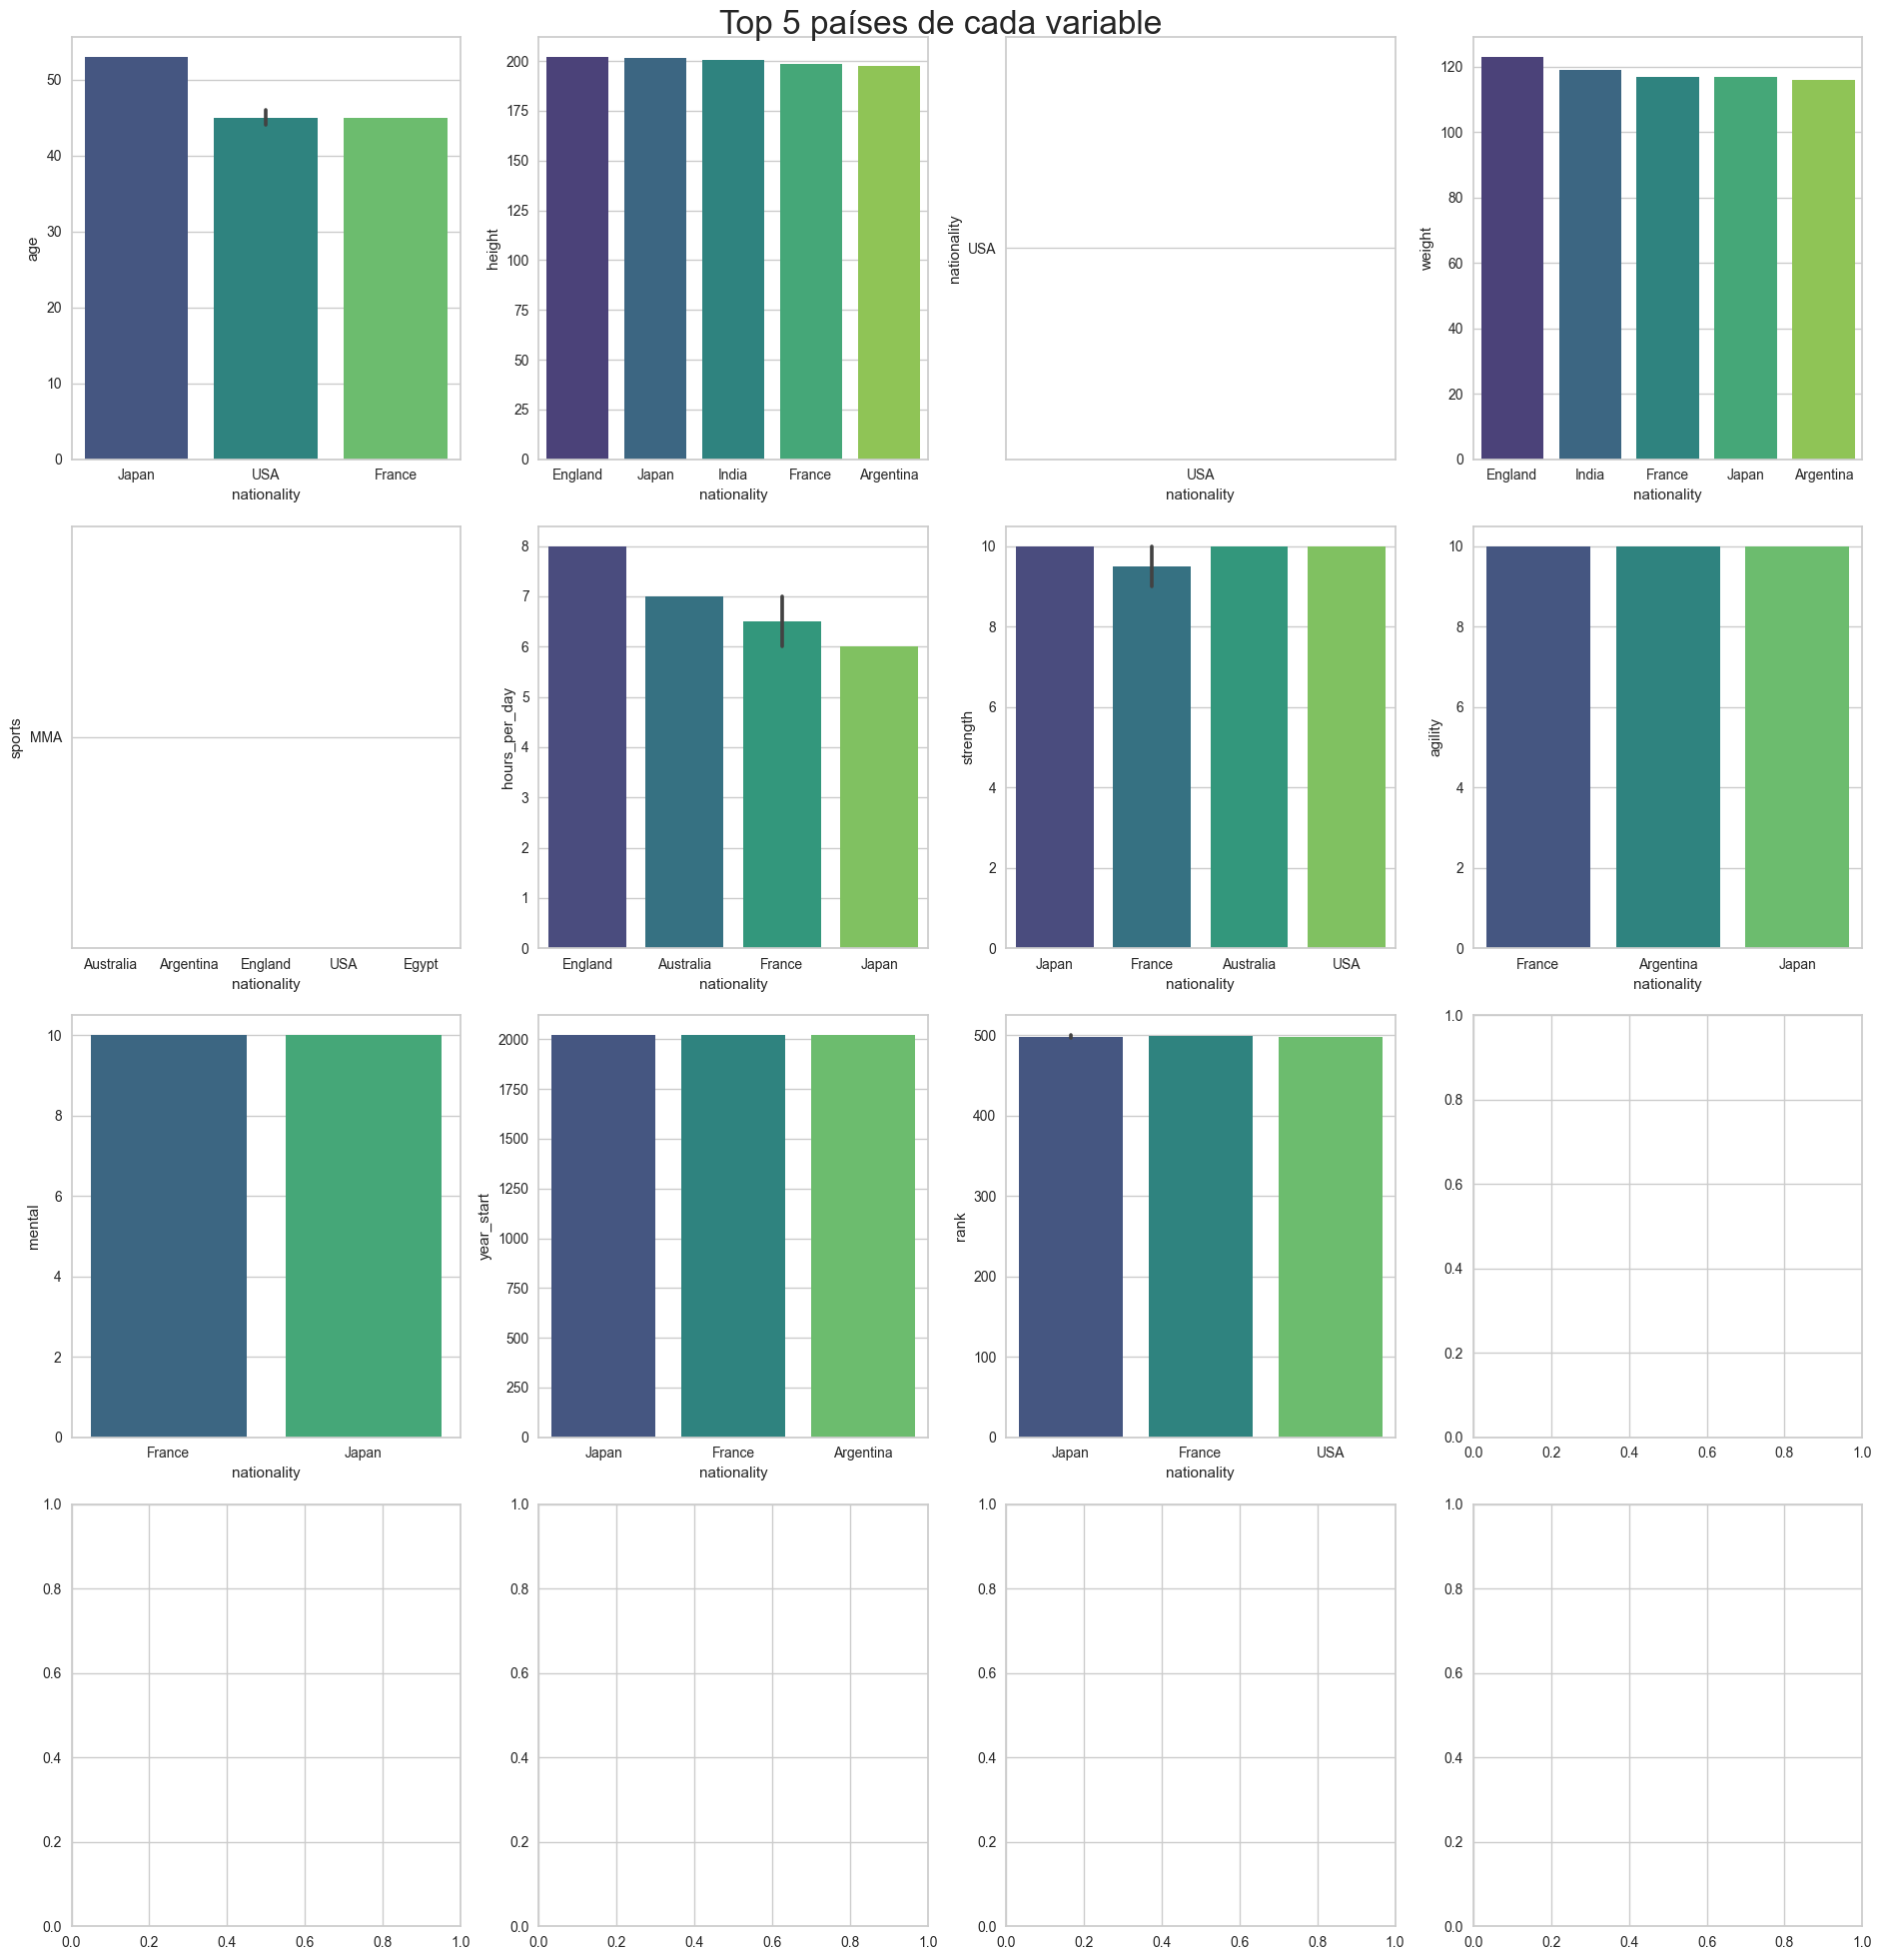

In [7]:
# de forma extraodinaria, vamos a mirar cuales son los países con mejores condiciones para cada una de las columnas categóricas que tenemos en el conjunto de datos
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 20))
axes = axes.flat
columns = df.columns[1:]
plt.suptitle("Top 5 países de cada variable", fontsize=24)
for x, col in enumerate(columns):
    sorted_df = df.sort_values(by=col, ascending=False)
    sns.barplot(x="nationality", y=col, data=sorted_df.head(5), ax=axes[x], palette="viridis")
plt.tight_layout()

In [8]:
# de forma extraodinaria, vamos a mirar cuales son los países con mejores condiciones para cada una de las columnas categóricas que tenemos en el conjunto de datos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(19, 20))
axes = axes.flat
columns = df.columns[1:]
plt.suptitle("Generos", fontsize=24)
for x, col in enumerate(columns):
    sorted_df = df.sort_values(by=col, ascending=False)
    sns.barplot(x="gender", y=col, data=sorted_df.head(5), ax=axes[x], palette="viridis")
plt.tight_layout()

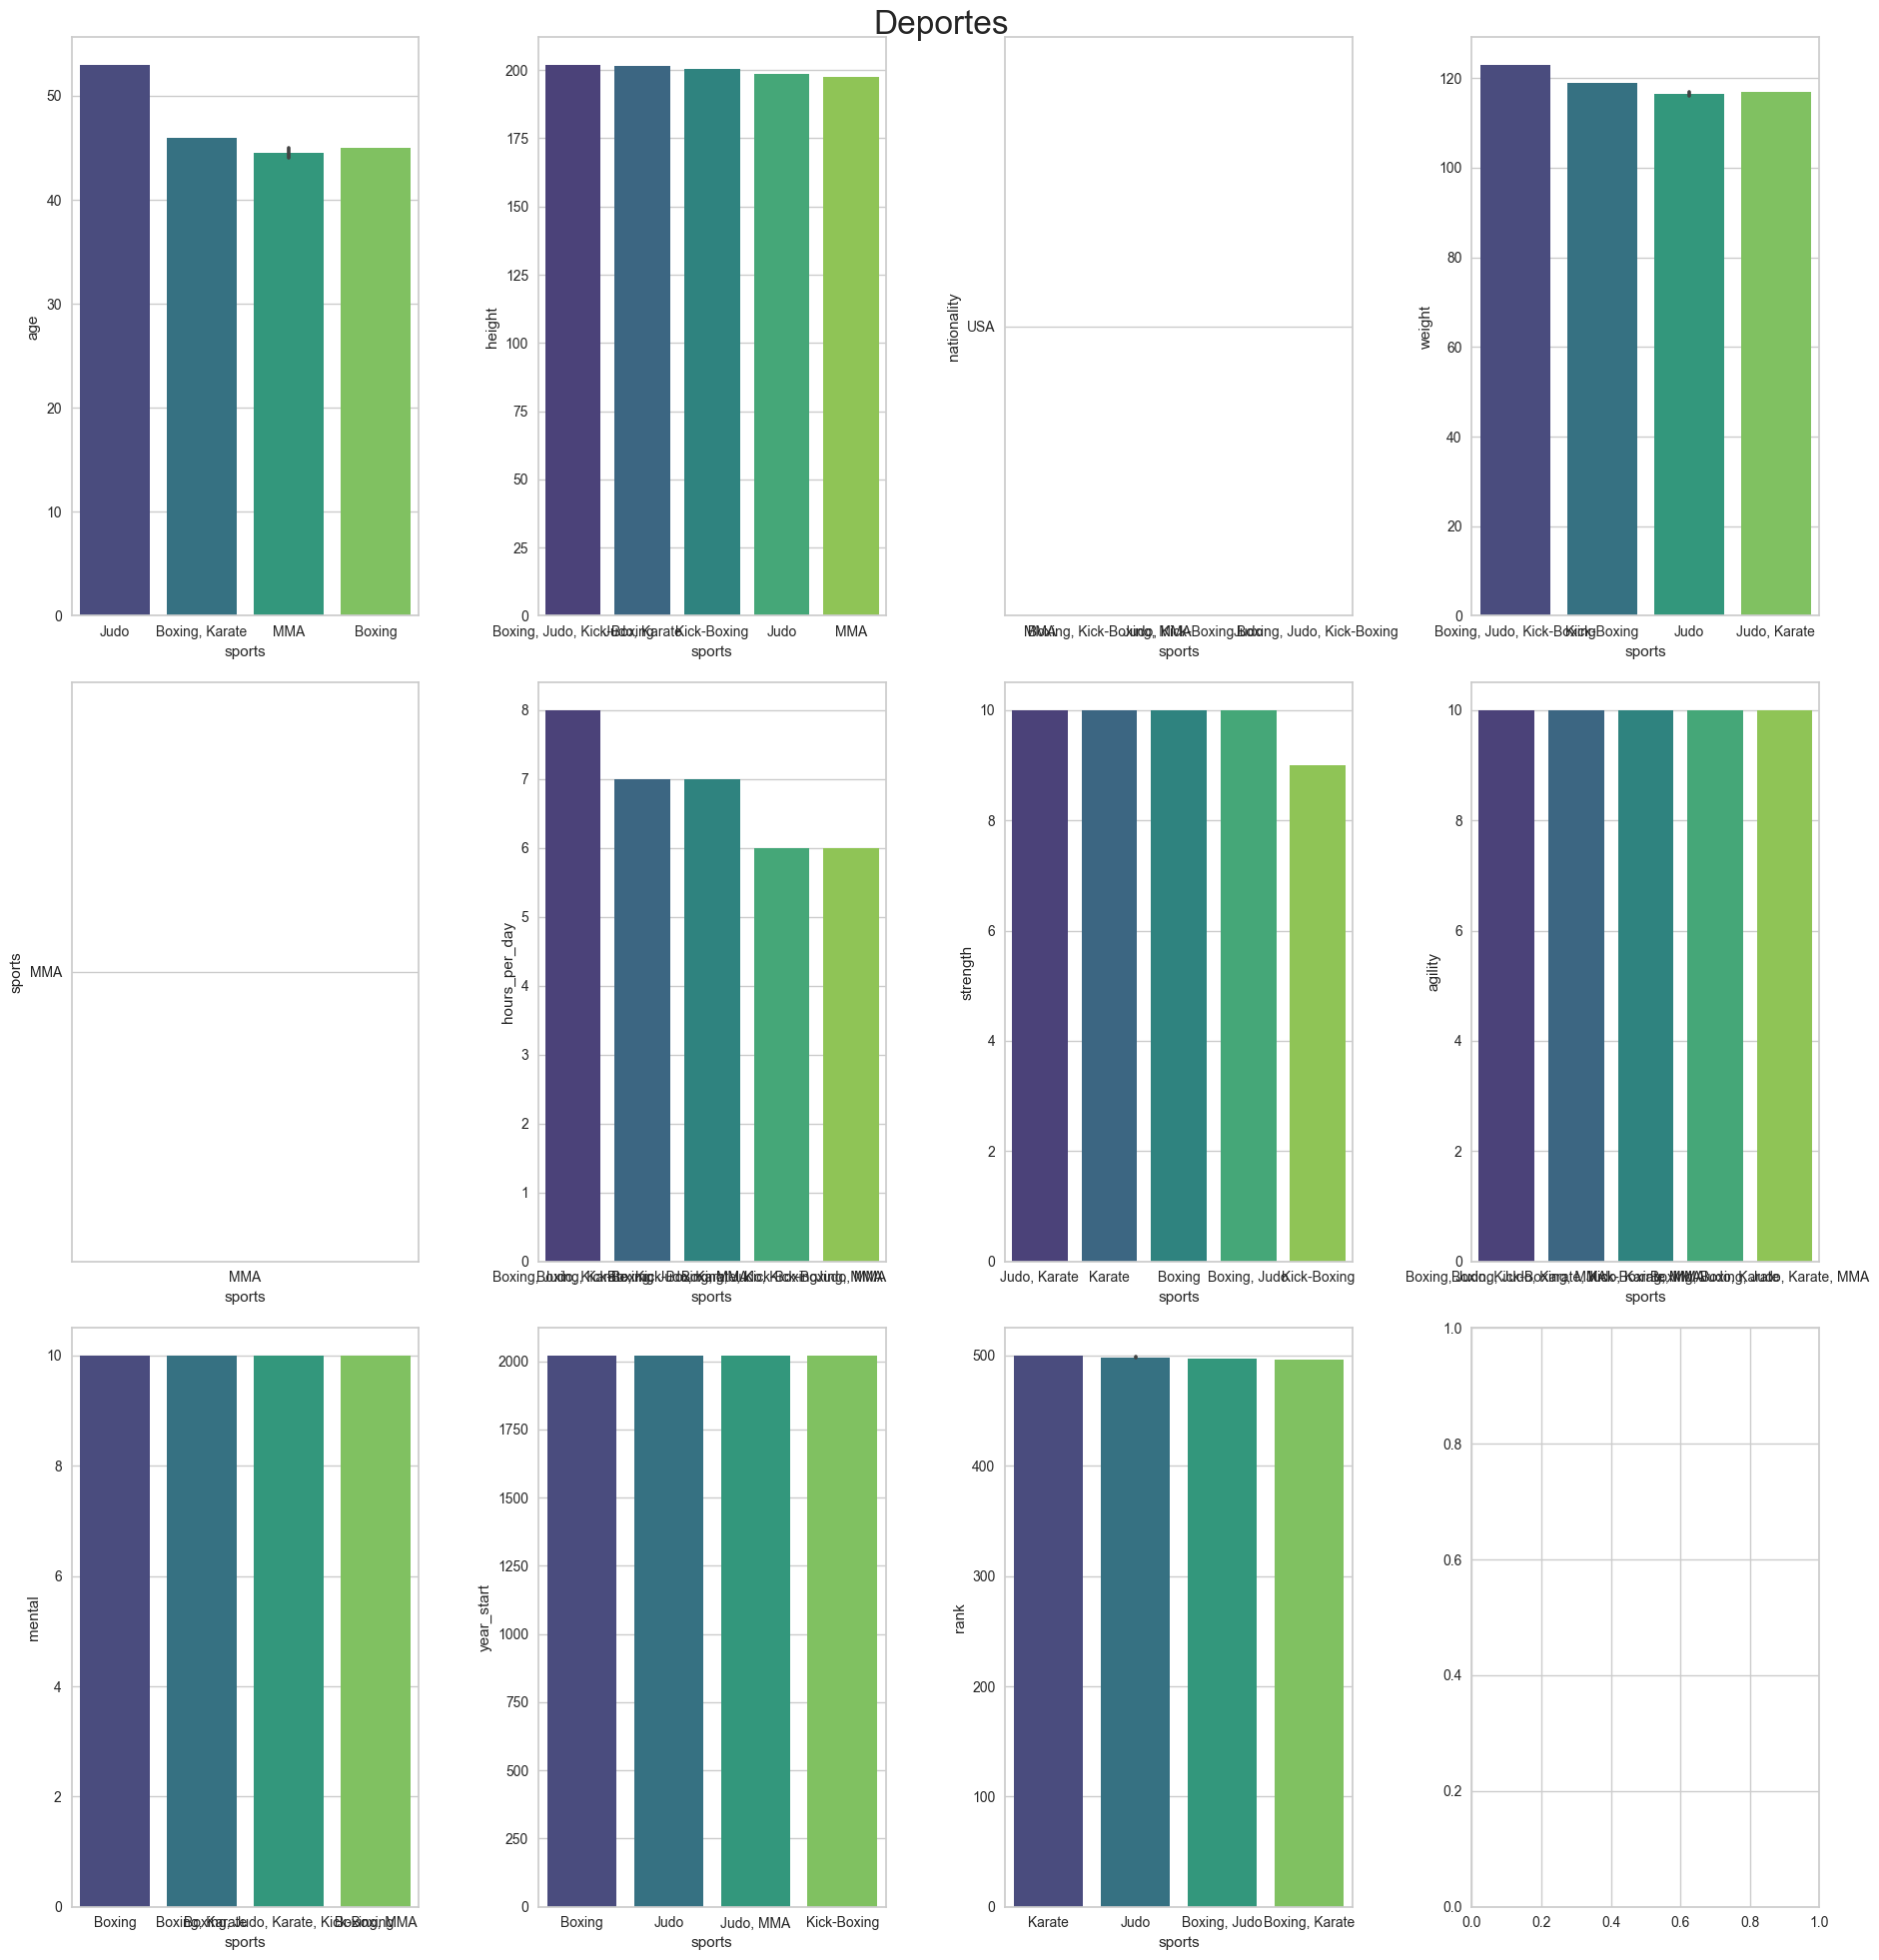

In [9]:
# de forma extraodinaria, vamos a mirar cuales son los países con mejores condiciones para cada una de las columnas categóricas que tenemos en el conjunto de datos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(19, 20))
axes = axes.flat
columns = df.columns[1:]
plt.suptitle("Deportes", fontsize=24)
for x, col in enumerate(columns):
    sorted_df = df.sort_values(by=col, ascending=False)
    sns.barplot(x="sports", y=col, data=sorted_df.head(5), ax=axes[x], palette="viridis")
plt.tight_layout()

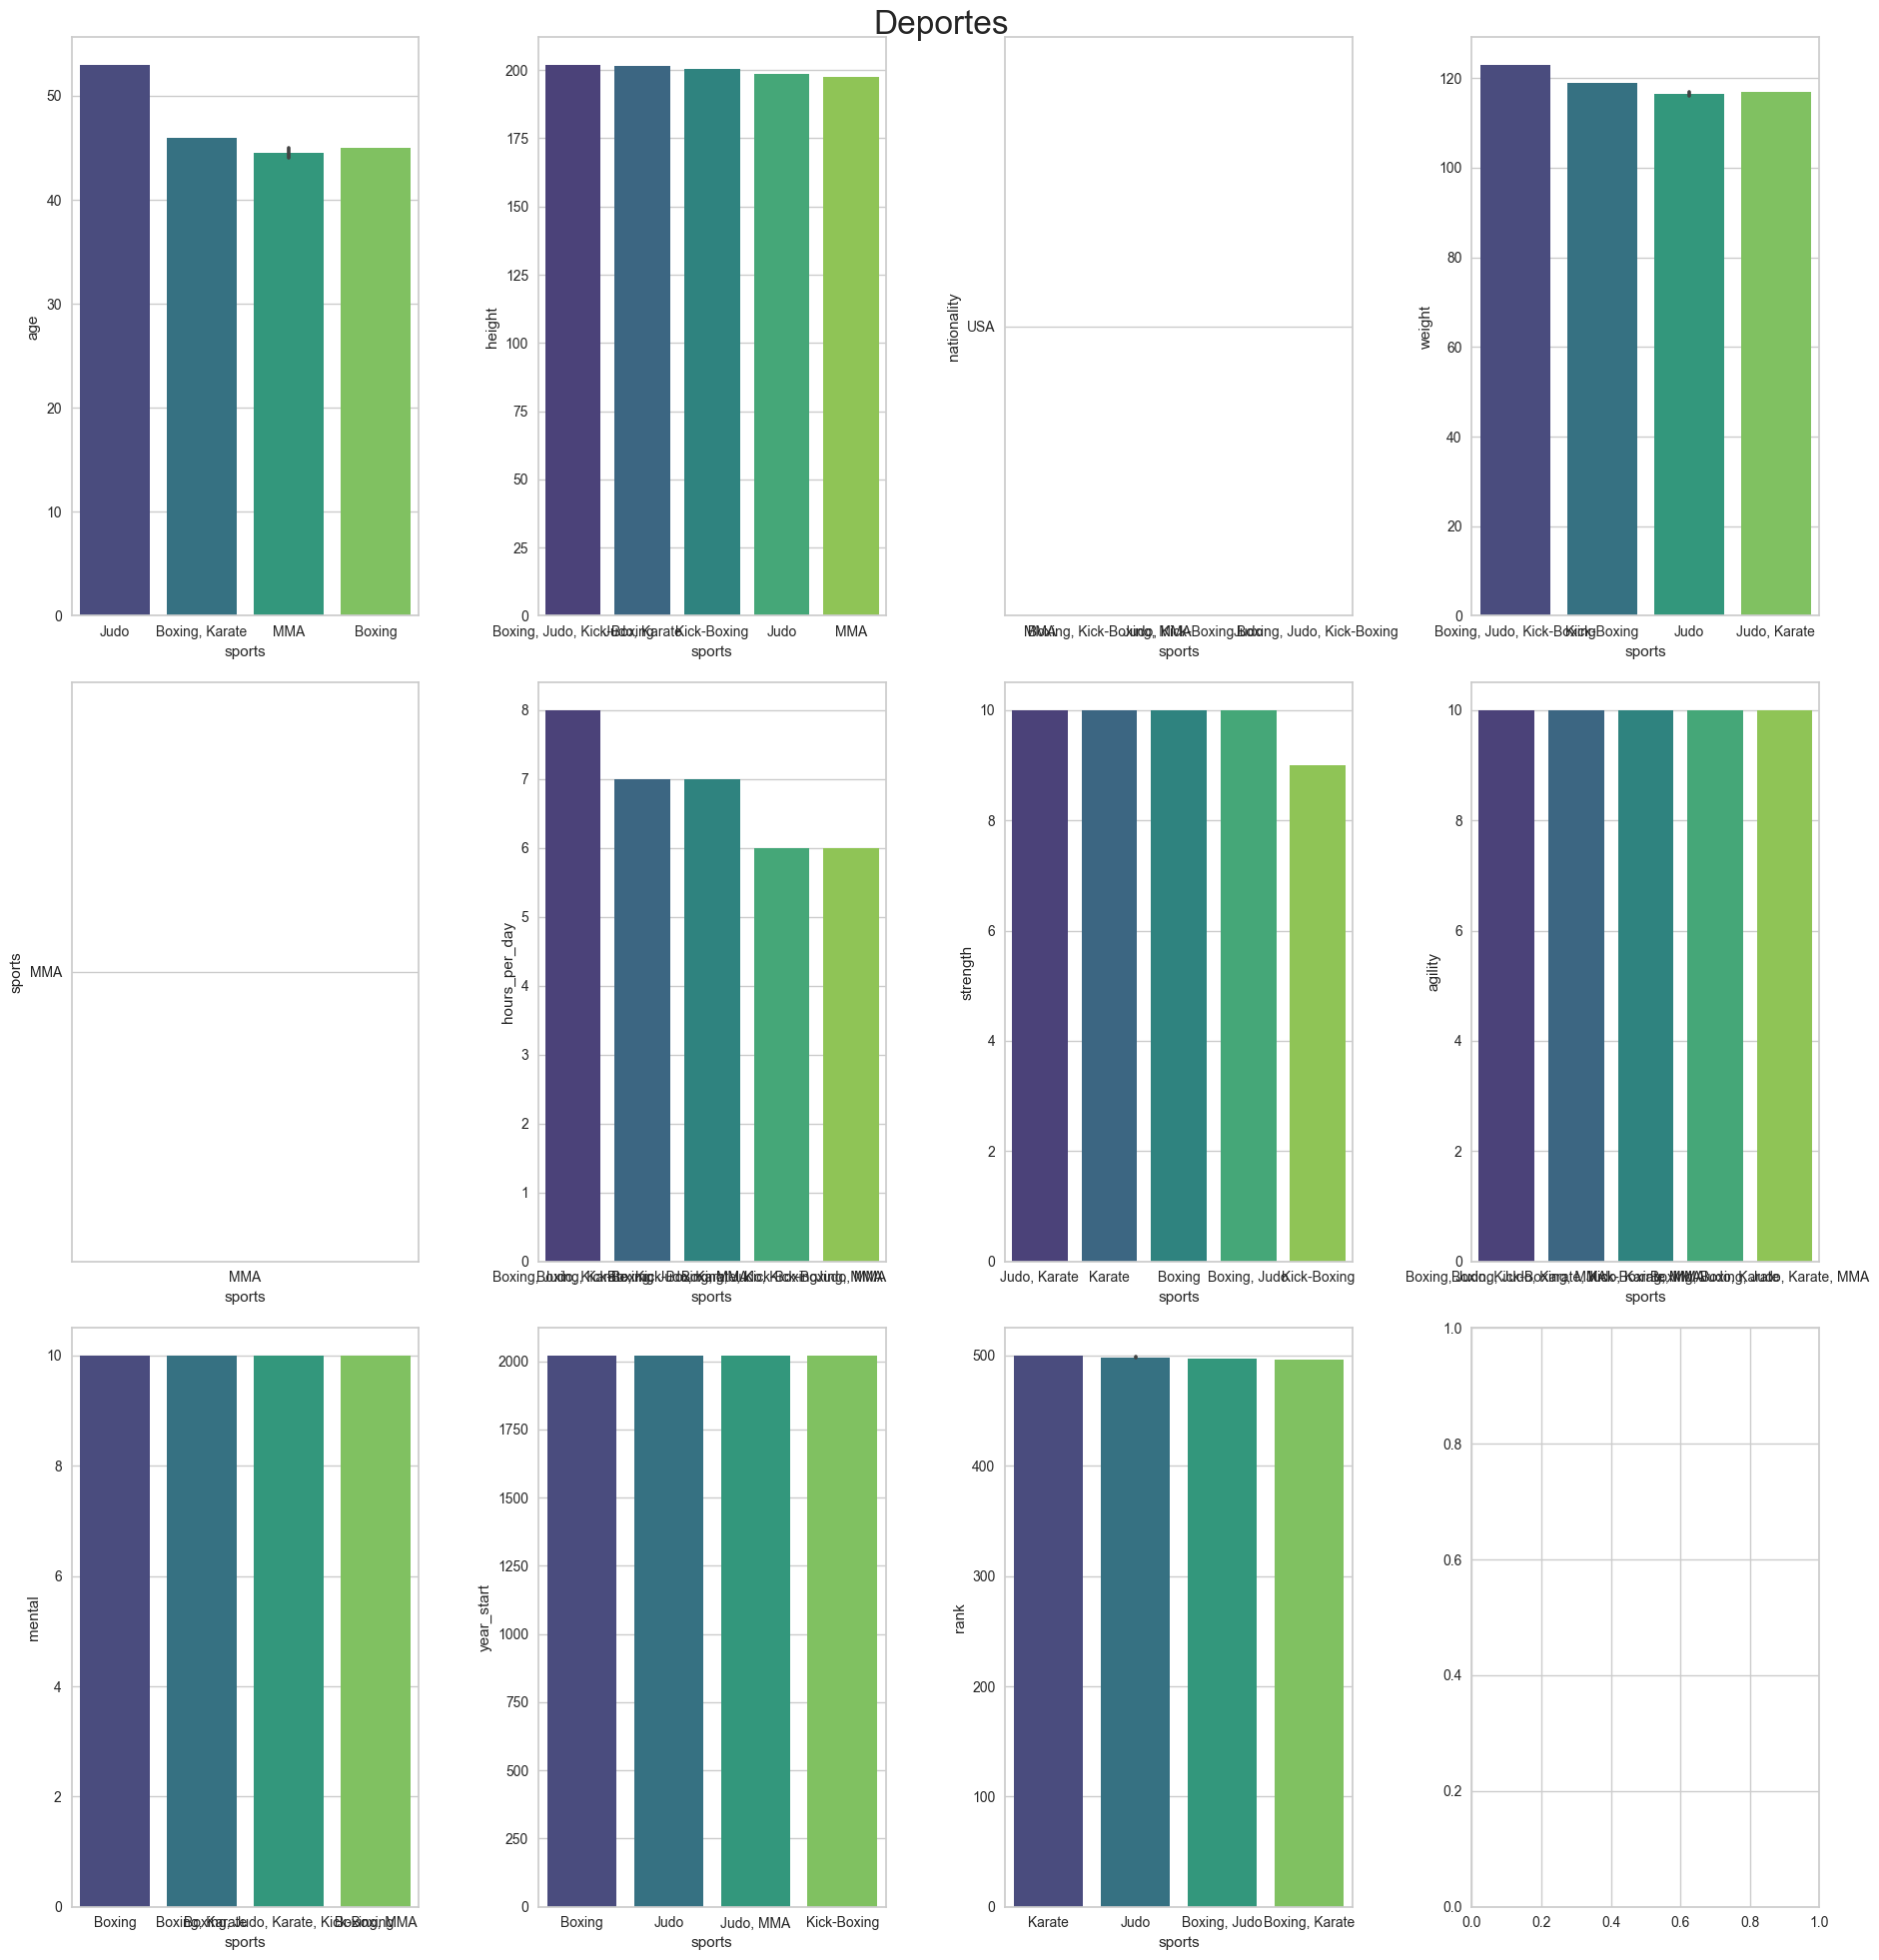

In [10]:
# de forma extraodinaria, vamos a mirar cuales son los países con mejores condiciones para cada una de las columnas categóricas que tenemos en el conjunto de datos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(19, 20))
axes = axes.flat
columns = df.columns[1:]
plt.suptitle("Deportes", fontsize=24)
for x, col in enumerate(columns):
    sorted_df = df.sort_values(by=col, ascending=False)
    sns.barplot(x="sports", y=col, data=sorted_df.head(5), ax=axes[x], palette="viridis")
plt.tight_layout()

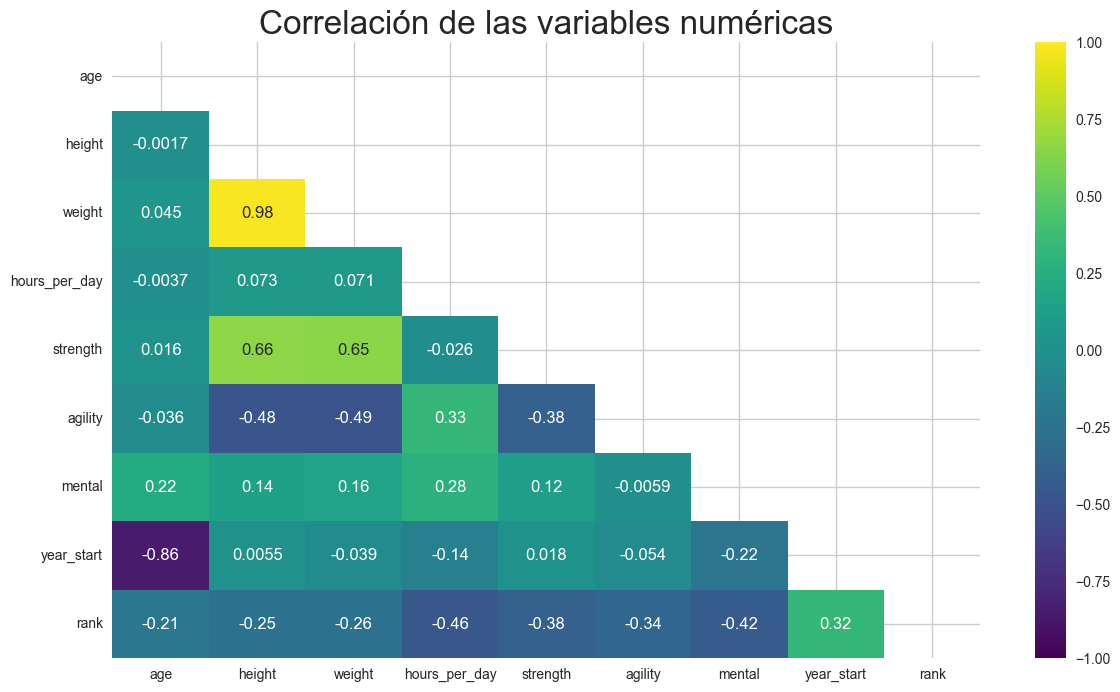

In [11]:
# evaluamos la correlación entre las variables numéricas
preprocesar.correlacion()

In [12]:
# instanciamos la clase de Preprocesado de datos antes de aplicar el algoritmo
preprocesar = sc.Preprocesado(df)

# estandarizamos los datos
df_copia = preprocesar.estandarizar()

# chequeamos que se estandarizó correctamente
df_copia.head()

gender       age    height nationality    weight       sports  \
0  Female  1.812234 -1.042800     England -0.694439  Boxing, MMA   
1    Male  0.891945  1.071555       Japan  0.931459         Judo   
2    Male -0.396461  0.384390       Japan  0.299165       Karate   
3    Male  1.444118  1.335850       Japan  1.563753         Judo   
4  Female -0.396461 -1.782824         USA -1.597716          MMA   

   hours_per_day  strength   agility    mental  year_start      rank  
0      -0.046579  0.541447  0.585973  0.223943   -2.868861 -1.444533  
1      -2.229969  1.179947 -1.477311  1.895156   -0.178809 -0.620075  
2       0.681218  1.179947  0.585973  0.223943    0.770621 -0.675501  
3      -0.046579  0.541447 -0.789550  1.059549   -0.653524  0.010392  
4      -1.502172 -0.735551 -0.101789  0.223943    0.770621  0.758640

In [13]:
preprocesar.codificar()

gender       age    height  nationality    weight  sports  hours_per_day  \
0      0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1      0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2      0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3      0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4      0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   
..      ...       ...       ...          ...       ...     ...            ...   
495    0.47  0.523829  1.124414        0.236  1.292770   0.058      -0.774376   
496    0.53 -0.028345 -1.412812        0.236 -1.688044   0.010       1.409014   
497    0.47 -1.684866  1.441567        0.236  1.112115   0.040      -0.046579   
498    0.53  0.155713  0.225813        0.236  0.208838   0.058      -0.774376   
499    0.53 -1.868924 -0.461352        0.236 -0.423456   0.014       0.681218   

     strength   agility    mental  year_start      rank  
0    0.541447  0.585973  0.223943   -2.868861 -1.444533  
1    1.179947 -1.477311  1.895156   -0.178809 -0.620075  
2    1.179947  0.585973  0.223943    0.770621 -0.675501  
3    0.541447 -0.789550  1.059549   -0.653524  0.010392  
4   -0.735551 -0.101789  0.223943    0.770621  0.758640  
..        ...       ...       ...         ...       ...  
495  1.818446 -0.789550 -1.447270    0.137667  0.710142  
496 -1.374051  1.273734 -0.611664   -0.653524 -1.222830  
497  1.179947  0.585973  0.223943    2.194766  0.100459  
498 -0.735551 -1.477311 -1.447270    0.770621  1.721662  
499 -0.097052  1.961495 -1.447270    0.612382 -1.098122  

[500 rows x 12 columns]

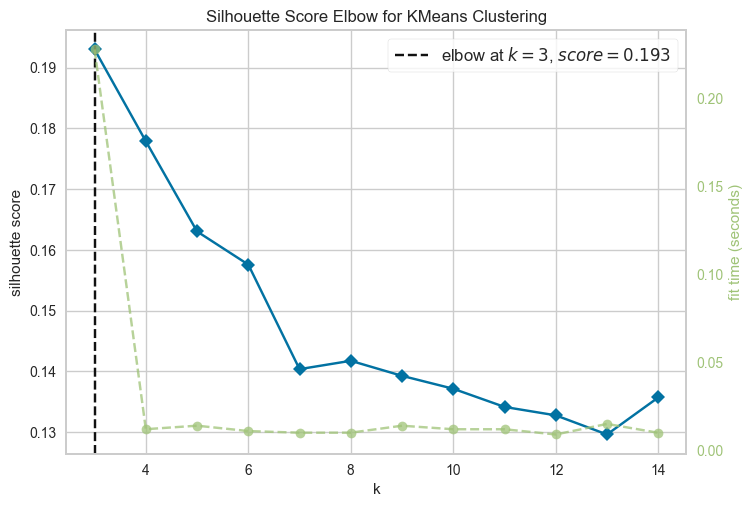

In [14]:
# instanciamos la clase de clustering
modelos = sc.Clustering(df_copia)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()


**¿Cómo interpretamos la gráfica?**

La gráfica muestra el *silhouette score* para diferentes números de clusters ($K$) utilizando K-Means.

- **Eje X (k)**: Número de clusters evaluados (3 a 15).

- **Eje Y Izquierdo**: *Silhouette score*, que mide la calidad de los clusters.

- **Eje Y Derecho**: Tiempo de ajuste del modelo.

Donde nos debemos fijar en la gráfica: 

- El *silhouette score* es más alto cuando $K = 3$, alcanzando un valor de aproximadamente 0.286 (este valor puede estar sujeto a cambios, fijaros siempre en el valor que nos da la gráfica).

- La línea negra discontinua marca el "codo" en $K = 3$, sugiriendo que este número de clusters proporciona la mejor separación y cohesión de los datos.


Por lo tanto, podemos decir que el número ideal de clusters para este conjunto de datos es $K = 3$, ya que maximiza el *silhouette score*, indicando clusters bien definidos y separados.


In [15]:
# aplicamos el modelo de Kmeans al dataframe 
df, labels  = modelos.modelo_kmeans(df, 3)

# mostramos el DataFrame
df.head()


gender       age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1    0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2    0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3    0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4    0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   

   strength   agility    mental  year_start      rank clusters_kmeans  
0  0.541447  0.585973  0.223943   -2.868861 -1.444533               0  
1  1.179947 -1.477311  1.895156   -0.178809 -0.620075               2  
2  1.179947  0.585973  0.223943    0.770621 -0.675501               0  
3  0.541447 -0.789550  1.059549   -0.653524  0.010392               2  
4 -0.735551 -0.101789  0.223943    0.770621  0.758640               1

In [16]:
modelos.calcular_metricas(labels=labels)

silhouette_score  davies_bouldin_index  cardinalidad
0           0.23309              1.470995           127


**Conclusiones de las métricas**
# Interpretación de Métricas de Clustering

| Métrica                  | Valor       | Interpretación                                                                                                              |
|--------------------------|-------------|----------------------------------------------------------------------------------------------------------------------------|
| **silhouette_score**   | **0.233793**| Mide la cohesión y separación de los clusters.                                                                             |
|                          |             | - **Cercano a 1**: Clusters bien definidos.                                                                                |
|                          |             | - **Cercano a 0**: Solapamiento entre clusters.                                                                            |
|                          |             | - **< 0**: Puntos mal asignados.                                                                                           |
|                          |             | **Resultado**: Clustering aceptable, pero no ideal. Puede haber solapamiento o separación insuficiente entre clusters.      |
| **davies_bouldin_index**| **1.462073**| Evalúa la compacidad y separación de los clusters.                                                                          |
|                          |             | - **Cercano a 0**: Clusters compactos y bien separados.                                                                    |
|                          |             | - **> 1**: Clusters menos compactos y más cercanos entre sí.                                                               |
|                          |             | **Resultado**: Clustering moderado, los clusters no están completamente separados y algunos puntos están dispersos.         |
| **cardinalidad**        | **176**      | Número de puntos asignados al cluster evaluado.                                                                            |
|                          |             | **Resultado**: 176 puntos en el cluster. Revisa la distribución de cardinalidades entre clusters para identificar desequilibrios.|


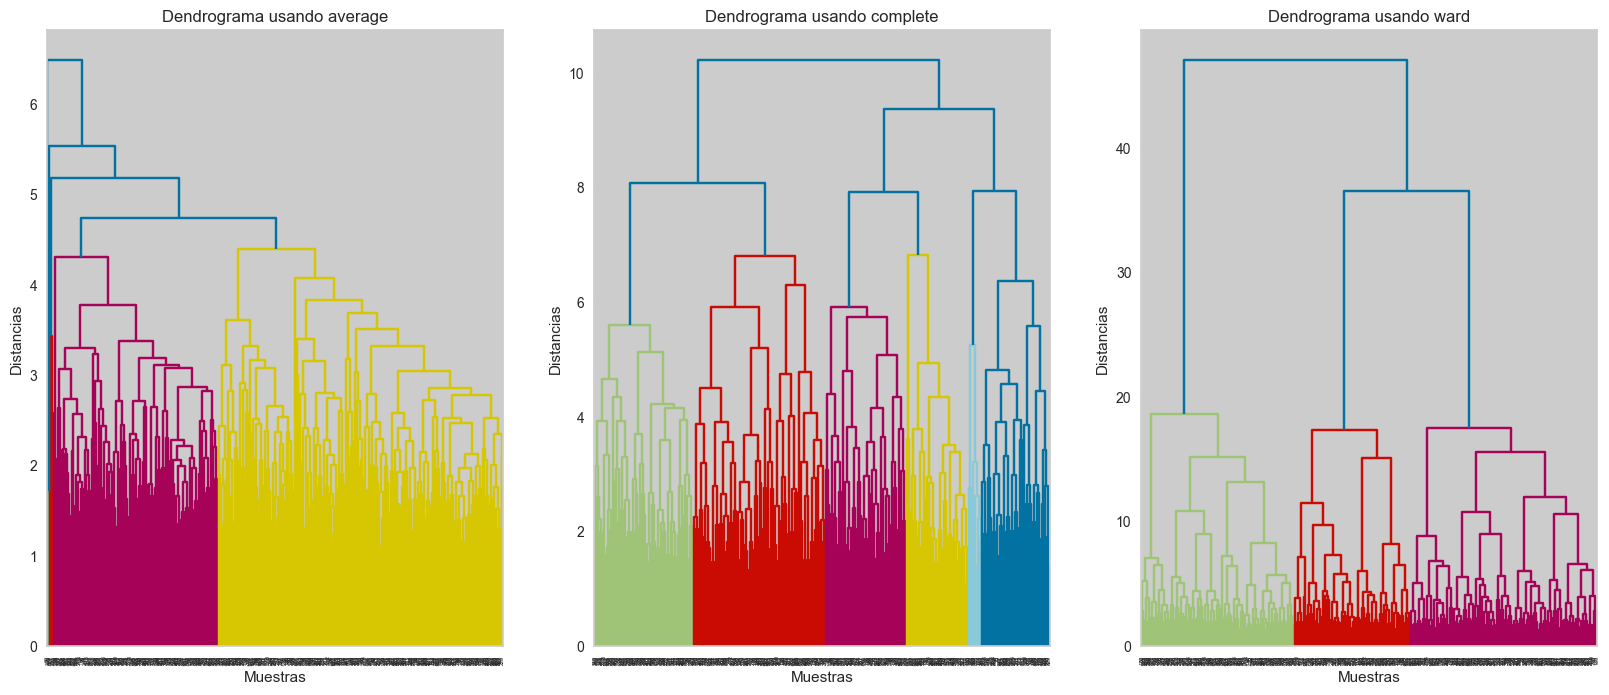

In [17]:
# visualizamos los dendrogramas para saber que método de distancia es el mejor para nuestros datos
modelos.visualizar_dendrogramas()

In [18]:
# aplicamos el modelo para sacar los clusters
df = modelos.modelo_aglomerativo(3, "ward", df)
df.head()

gender       age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.812234 -1.042800        0.052 -0.694439   0.062      -0.046579   
1    0.47  0.891945  1.071555        0.232  0.931459   0.058      -2.229969   
2    0.47 -0.396461  0.384390        0.232  0.299165   0.084       0.681218   
3    0.47  1.444118  1.335850        0.232  1.563753   0.058      -0.046579   
4    0.53 -0.396461 -1.782824        0.230 -1.597716   0.068      -1.502172   

   strength   agility    mental  year_start      rank clusters_kmeans  \
0  0.541447  0.585973  0.223943   -2.868861 -1.444533               0   
1  1.179947 -1.477311  1.895156   -0.178809 -0.620075               2   
2  1.179947  0.585973  0.223943    0.770621 -0.675501               0   
3  0.541447 -0.789550  1.059549   -0.653524  0.010392               2   
4 -0.735551 -0.101789  0.223943    0.770621  0.758640               1   

  clusters_agglomerative  
0                      2  
1                      0  
2                      2  
3                      0  
4                      1